# Trabajo IA

## Selección de características para mejorar modelos predictivos

Aqui añadimos una descripcion de lo que vamos a hacer y tal

### Algoritmo de búsqueda hacia atrás

In [9]:
import pandas as pd
import pyModules.BusquedaSecuencialAtras as bsa
import pyModules.RobustEvaluation as re
titanic = pd.read_csv('../data/titanic.csv')
titanic.head()
bsa.backward_sequential_search(titanic, 'Survived', 29)


AttributeError: module 'pyModules.RobustEvaluation' has no attribute 'robust_evaluation'

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat,Deck,Title,Is_Married,Survived
0,3,male,22.0,1,0,7.2500,S,0,1,1,No,0,U,11,0,0
1,1,female,38.0,1,0,71.2833,C,1,2,1,No,3,C,12,1,1
2,3,female,26.0,0,0,7.9250,S,2,1,0,Yes,1,U,8,0,1
3,1,female,35.0,1,0,53.1000,S,1,2,1,No,3,C,12,1,1
4,3,male,35.0,0,0,8.0500,S,0,2,0,Yes,1,U,11,0,0


#### Algoritmo: árboles decisión de clasificación

In [39]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
from sklearn.tree import plot_tree

In [31]:
atributos_discretos = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Initial', 'Age_band', 
'Family_Size', 'Alone', 'Fare_cat', 'Deck', 'Title', 'Is_Married']
atributos_continuos = ['Age', 'Fare']
atributos = titanic.loc[:, atributos_discretos + atributos_continuos]


In [22]:
objetivo = titanic['Survived']
objetivo.head()  # objetivo es una Series unidimensional

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [34]:
codificador_atributos_discretos = OrdinalEncoder()
codificador_atributos_discretos.fit(atributos[atributos_discretos])

atributos[atributos_discretos] = codificador_atributos_discretos.transform(
    atributos[atributos_discretos]
)
atributos.head()

,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat,Deck,Title,Is_Married,Age,Fare
0,2.0,1.0,1.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,8.0,11.0,0.0,22.0,7.2500
1,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0,3.0,2.0,12.0,1.0,38.0,71.2833
2,2.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,1.0,1.0,8.0,8.0,0.0,26.0,7.9250
3,0.0,0.0,1.0,0.0,2.0,1.0,2.0,1.0,0.0,3.0,2.0,12.0,1.0,35.0,53.1000
4,2.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,1.0,8.0,11.0,0.0,35.0,8.0500


In [43]:
codificador_objetivo = LabelEncoder()
objetivo = codificador_objetivo.fit_transform(objetivo)
print(f'Clases detectadas: {codificador_objetivo.classes_}')


Clases detectadas: [0 1]


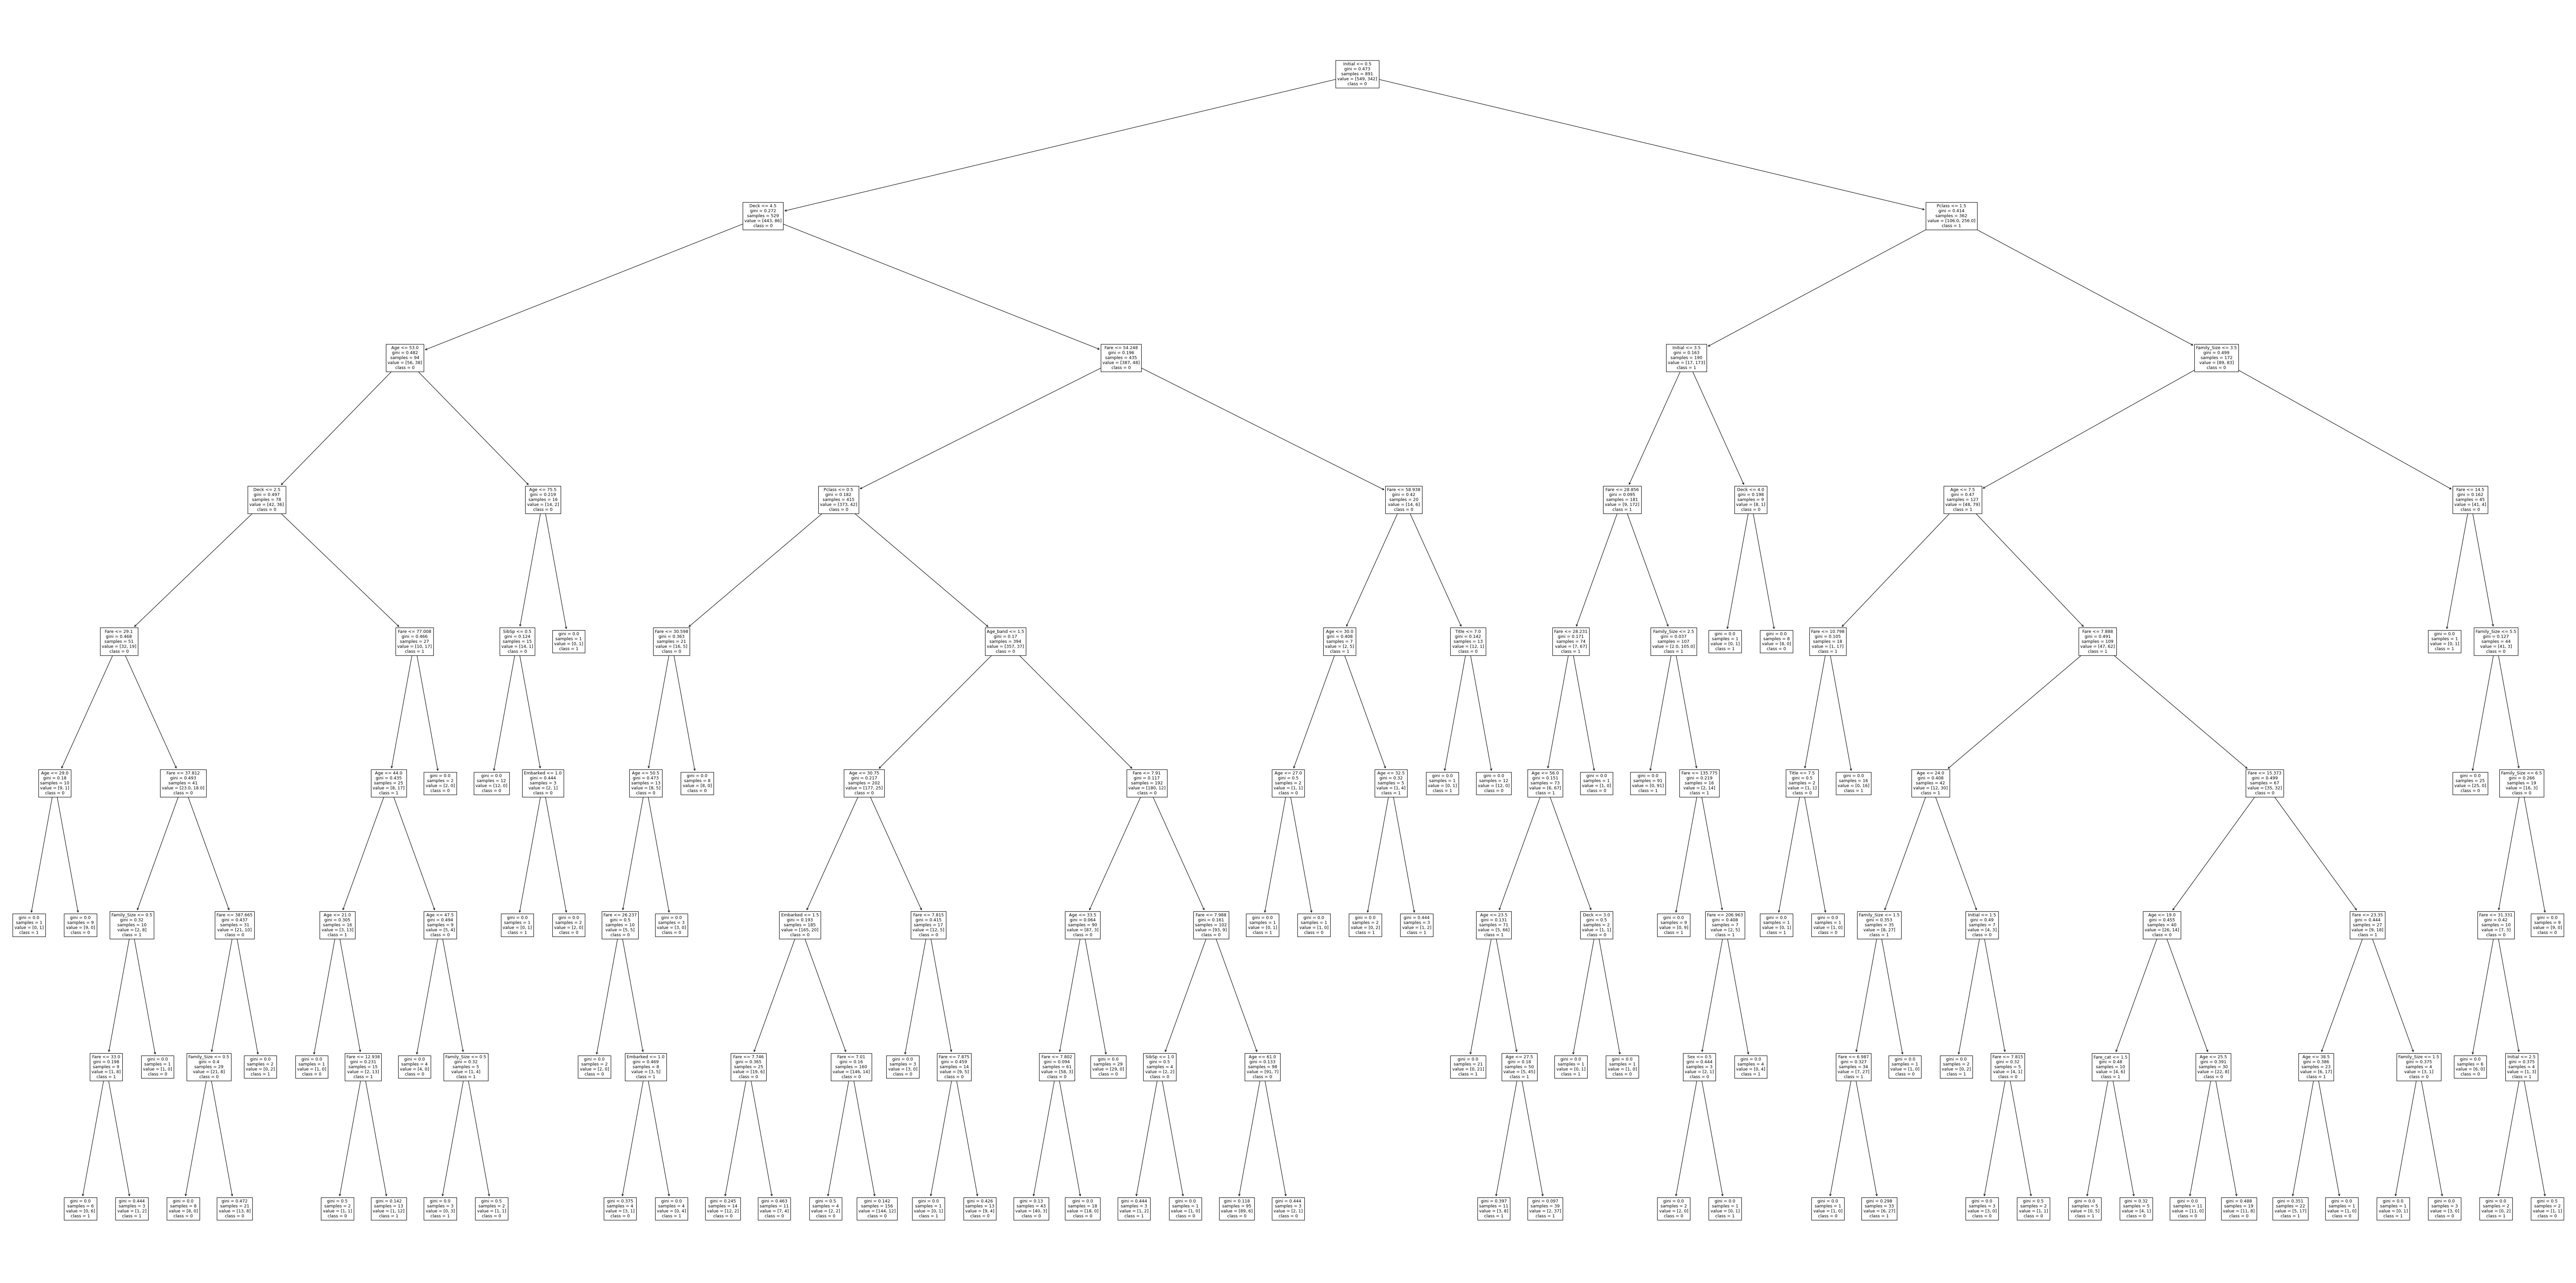

In [55]:

clasificador_CART = DecisionTreeClassifier(
    max_depth=8
)
clasificador_CART.fit(atributos, objetivo)


pyplot.figure(figsize=(100, 50))  # Anchura y altura del gráfico
árbol = plot_tree(clasificador_CART,
                  # El argumento feature_names permite proporcionar, en una
                  # lista, los nombres de los atributos.
                  feature_names=atributos_discretos + atributos_continuos,
                  # El argumento class_names permite proporcionar, en una
                  # lista, los nombres de las clases
                  class_names=['0', '1'])

In [53]:
# Predicciones

predicciones = clasificador_CART.predict(atributos)
predicciones


array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,

In [54]:
clasificador_CART.score(atributos, objetivo)


0.8484848484848485

In [56]:
pd.Series(objetivo).value_counts()


0    549
1    342
Name: count, dtype: int64

In [57]:
pd.Series(predicciones).value_counts()

0    546
1    345
Name: count, dtype: int64

### Tasa de aciertos balanceada

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

(atributos_entrenamiento, atributos_prueba,
 objetivo_entrenamiento, objetivo_prueba) = train_test_split(
        # Conjuntos de datos a dividir, usando los mismos índices para ambos
        atributos, objetivo,
        # Tamaño del conjunto de prueba (20 % en este caso)
        test_size=.2,
        # Estratificación según la distribución de clases en el atributo objetivo
        stratify=objetivo)


clasificador_CART = DecisionTreeClassifier(
    max_depth=4,  # Máxima profundidad del árbol
    min_samples_split=5  # Mínimo número de ejemplos para poder particionar
)

resultados_validación_cruzada = cross_validate(clasificador_CART,
                                               atributos_entrenamiento,
                                               objetivo_entrenamiento,
                                               scoring='recall',
                                               cv=10)
resultados_validación_cruzada


resultados_validación_cruzada['test_score'].mean()

0.6481481481481481